# Game of life
Invented by Conway etc.

In [241]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import imageio

cmap = colors.ListedColormap(['blue', 'white', 'red'])
N = 15

In [242]:
arr = np.random.randint(3, size=N ** 2, dtype=np.int8).reshape(N, N)

In [244]:
# Tuple ind surroundings must have at most as many elements as dimensions in `arr`
surrounding_0 = [(1, 0), (-1, 0), (0, 1), (0, -1)]
surrounding_1 = [(1, 1), (-1, -1), (-1, 1), (1, -1)]
surrounding_2 = [(1, 1), (-1, -1), (-1, 1), (1, -1)]

transitions_0 = [((0, 1), 1), ((2, 3), 1), ((4, np.inf), 0)]
transitions_1 = [((0, 2), 0), ((3, 3), 1), ((4, np.inf), 1)]
transitions_2 = [((0, 2), 2), ((3, 4), 1), ((4, np.inf), 0)]

rules = {
    0: (surrounding_0, transitions_0), 
    1: (surrounding_1, transitions_1),
    2: (surrounding_2, transitions_2)
}

In [245]:
def get_values(arr, surrounding):
    values = np.zeros(shape=arr.shape)
    for cell in surrounding:
        intermediary = arr.copy()
        for i in range(len(cell)):
            intermediary = np.roll(intermediary, cell[i], axis=i)
        values = np.add(values, intermediary).astype(np.int8)
    return values

In [246]:
def get_result(values, transitions, mask):
    for (inf, sup), rvalue in transitions:
        mask_rule = (values >= inf) & (values <= sup) & mask
        np.putmask(values, mask_rule, rvalue)
    return values

In [247]:
def forward(arr, rules):
    for value, (surrounding, transitions) in rules.items():
        mask = (arr == value)
        values = get_values(arr, surrounding)
        arr = get_result(values, transitions, mask)
        np.putmask(arr, mask, values)
    return arr

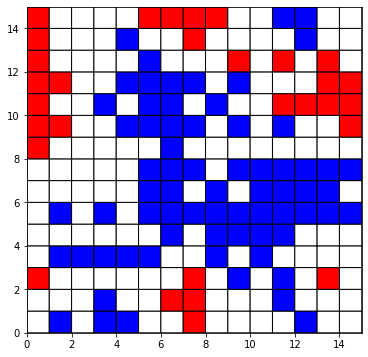

In [248]:
arr = forward(arr, rules)

plt.figure(figsize=(6,6))
plt.pcolor(arr[::-1], cmap=cmap ,edgecolors='k', linewidths=1)
plt.show()

In [256]:
N_STEPS = 30

def successive_plots(n_steps, arr, rules):
    images = []
    for i in range(n_steps):
        if i > 0:
            arr = forward(arr, rules)

        fig, ax = plt.subplots(figsize=(6, 6))
        ax.pcolor(arr[::-1], cmap=cmap ,edgecolors='k', linewidths=1)
        ax.set_xticks([])
        ax.set_yticks([])
        # Used to return the plot as an image rray
        fig.canvas.draw()       # draw the canvas, cache the renderer
        plt.close(fig)
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)
    return images

imageio.mimsave('./gol.gif', successive_plots(N_STEPS, arr, rules), fps=2)

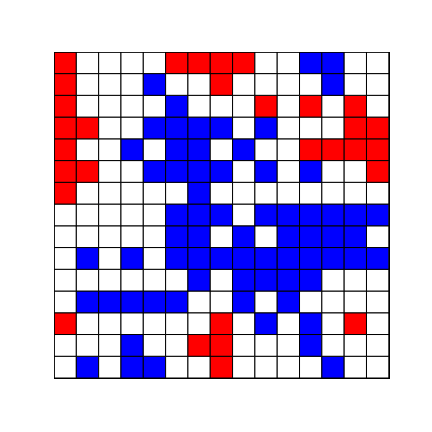

In [257]:
from IPython.display import display, Image

with open('gol.gif', 'rb') as f:
    display(Image(data=f.read(), format='png'))